<a href="https://colab.research.google.com/github/dkuzzmin/DI-Bootcamp/blob/main/Week8/Day4-5/Hackaton3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('Online Retail.xlsx')


In [ ]:
df.to_csv('onlineretail.csv', index=False)

#  0. Data cleaning, preparation

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df[df['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


## 0.1. Changing data types

Labeling NaN-customers to 1

In [ ]:
df['CustomerID'].fillna(1, inplace=True)

Convert column to INTEGER

In [ ]:
df['CustomerID'] = df['CustomerID'].astype(int)

## 0.2. Cleaning data

Deleting adjustment rows

In [ ]:
df[df['UnitPrice'] <0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,1,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,1,United Kingdom


In [ ]:
df.drop(df[df['UnitPrice'] < 0].index, inplace=True)


Deleting rows with missing data on prices and customers

In [ ]:
df[(df['UnitPrice'] == 0) & (df['CustomerID'] == 1)]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Month
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,2010-12-01 11:52:00,0.0,1,United Kingdom,0.0,December
2406,536589,21777,RECIPE BOX WITH METAL HEART,-10,2010-12-01 16:50:00,0.0,1,United Kingdom,-0.0,December
4347,536764,84952C,MIRROR LOVE BIRD T-LIGHT HOLDER,-38,2010-12-02 14:42:00,0.0,1,United Kingdom,-0.0,December
4348,536765,84952C,MIRROR LOVE BIRD T-LIGHT HOLDER,19,2010-12-02 14:43:00,0.0,1,United Kingdom,0.0,December
6391,536941,22734,SET OF 6 RIBBONS VINTAGE CHRISTMAS,20,2010-12-03 12:08:00,0.0,1,United Kingdom,0.0,December
...,...,...,...,...,...,...,...,...,...,...
535336,581213,22576,SWALLOW WOODEN CHRISTMAS DECORATION,-30,2011-12-07 18:38:00,0.0,1,United Kingdom,-0.0,December
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,1,United Kingdom,-0.0,December
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,1,United Kingdom,0.0,December
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,1,United Kingdom,0.0,December


In [ ]:
rows_to_drop = df[(df['UnitPrice'] == 0) & (df['CustomerID'] == 1)].index

df.drop(rows_to_drop, inplace=True)

Deleting postage expenses

In [ ]:
df[df['Description'] == 'DOTCOM POSTAGE']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,1,United Kingdom
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,1,United Kingdom
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,1,United Kingdom
5545,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,1,United Kingdom
5685,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,1,United Kingdom
...,...,...,...,...,...,...,...,...
536834,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,1,United Kingdom
537254,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,1,United Kingdom
539368,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,1,United Kingdom
540908,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,1,United Kingdom


In [ ]:
rows_to_drop = df[df['Description'] == 'DOTCOM POSTAGE'].index

df.drop(rows_to_drop, inplace=True)

In [ ]:
df[df['Description'] == 'POSTAGE']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583,France
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,12662,Germany
5073,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,12738,Germany
5258,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.0,12686,France
...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,2011-12-09 10:10:00,15.0,12423,Belgium
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.0,12518,Germany
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.0,12662,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.0,12526,Germany


In [ ]:
rows_to_drop = df[df['Description'] == 'POSTAGE'].index

df.drop(rows_to_drop, inplace=True)

In [ ]:
df[(df['Description'] == 'Manual') & (df['UnitPrice'] == 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
285657,561916,M,Manual,1,2011-08-01 11:44:00,0.0,15581,United Kingdom
361825,568384,M,Manual,1,2011-09-27 09:46:00,0.0,12748,United Kingdom
395529,571035,M,Manual,1,2011-10-13 12:50:00,0.0,12446,RSA
436961,574252,M,Manual,1,2011-11-03 13:24:00,0.0,12437,France
479546,577168,M,Manual,1,2011-11-18 10:42:00,0.0,12603,Germany
485985,577696,M,Manual,1,2011-11-21 11:57:00,0.0,16406,United Kingdom


In [ ]:
rows_to_drop = df[(df['Description'] == 'Manual') & (df['UnitPrice'] == 0)].index

df.drop(rows_to_drop, inplace=True)

Cleaning irrellevant data

In [ ]:
df[(df['Description'] == 'AMAZON FEE')  | (df['Description'] == 'Bank Charges')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Month
4406,536779,BANK CHARGES,Bank Charges,1,2010-12-02 15:08:00,15.00,15823,United Kingdom,15.00,December
14435,C537572,BANK CHARGES,Bank Charges,-1,2010-12-07 12:00:00,95.38,1,United Kingdom,-95.38,December
14514,C537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1.00,1,United Kingdom,-1.00,December
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,1,United Kingdom,-13541.33,December
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,1,United Kingdom,13541.33,December
...,...,...,...,...,...,...,...,...,...,...
481153,C577343,BANK CHARGES,Bank Charges,-1,2011-11-18 15:13:00,27.21,1,United Kingdom,-27.21,November
506357,579137,BANK CHARGES,Bank Charges,1,2011-11-28 12:51:00,15.00,14704,United Kingdom,15.00,November
524601,C580604,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:35:00,11586.50,1,United Kingdom,-11586.50,December
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,1,United Kingdom,-17836.46,December


In [ ]:
rows_to_drop = df[(df['Description'] == 'AMAZON FEE')  | (df['Description'] == 'Bank Charges')].index

df.drop(rows_to_drop, inplace=True)

In [ ]:
df[(df['Description'] == 'Manual')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Month
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274,United Kingdom,1.25,December
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274,United Kingdom,18.95,December
5684,536865,M,Manual,1,2010-12-03 11:28:00,2.55,1,United Kingdom,2.55,December
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723,United Kingdom,1.70,December
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062,United Kingdom,5.04,December
...,...,...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841,United Kingdom,5.00,December
533082,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971,United Kingdom,-125.00,December
534308,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490,United Kingdom,-9.95,December
538321,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521,United Kingdom,1.26,December


## 0.3. Filling missing data

In [ ]:
df[df['Description'].isna()]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,1,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,1,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,1,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,1,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,1,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,1,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,1,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,1,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,1,United Kingdom


Creating dictionary of item's description

In [ ]:
stock_description_dict = df.set_index('StockCode')['Description'].to_dict()

df_temp = pd.DataFrame.from_dict(stock_description_dict, orient='index', columns=['Description'])
df_temp.dropna(inplace=True)
stock_description_dict = df_temp['Description'].to_dict()


Replace missing descriptions with values from dictionary

In [ ]:
for index, row in df.iterrows():
    stock_code = row['StockCode']
    if stock_code in stock_description_dict:
        df.at[index, 'Description'] = stock_description_dict[stock_code]


In [ ]:
df[df['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,1,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,1,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,1,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,1,United Kingdom
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,1,United Kingdom
...,...,...,...,...,...,...,...,...
533712,581103,22689,NaN,4,2011-12-07 11:58:00,0.0,1,United Kingdom
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,1,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,1,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,1,United Kingdom


In [ ]:
df[df['Description'].isna()]['UnitPrice'].sum()


0.0

Drop remaining null-values in 'Description'

In [ ]:
rows_to_drop = df[df['Description'].isna()].index

df.drop(rows_to_drop, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539246 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    539246 non-null  object        
 1   StockCode    539246 non-null  object        
 2   Description  539246 non-null  object        
 3   Quantity     539246 non-null  int64         
 4   InvoiceDate  539246 non-null  datetime64[ns]
 5   UnitPrice    539246 non-null  float64       
 6   CustomerID   539246 non-null  int64         
 7   Country      539246 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 37.0+ MB


## 0.4. Adding new column

In [ ]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

# .1. Customer Segmentation and Profiling:

## 1.1. Geographical Distribution of Customers:



In [ ]:
sales_by_countries = df.groupby('Country')['Sales'].sum()
sales_by_countries = sales_by_countries.sort_values(ascending=False)
uk =  sales_by_countries[:1].sum()
nonuk = sales_by_countries[1:].sum()
print(uk)
print(nonuk)

8005093.574
1492302.3599999999


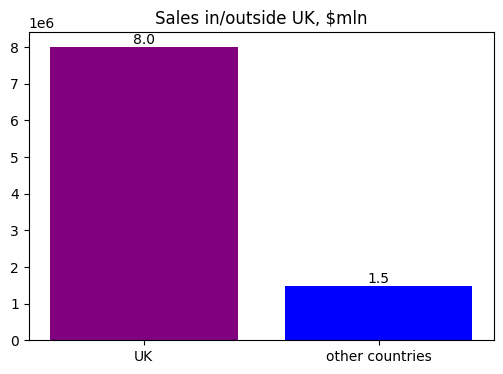

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(['UK', 'other countries'], [uk, nonuk], color=['purple', 'blue'])
plt.title('Sales in/outside UK, mln')
plt.annotate(str(round(uk/1000000,1)), (0, uk), ha='center', va='bottom')
plt.annotate(str(round(nonuk/1000000,1)), (1, nonuk), ha='center', va='bottom')
plt.show()

In [ ]:
#top10 (exl. UK)
sales_by_countries[1:11]


Country
Netherlands    283167.54
EIRE           263276.82
Germany        200877.21
France         182338.90
Australia      136990.00
Switzerland     52505.35
Spain           48922.58
Belgium         36662.96
Japan           35340.62
Sweden          35206.91
Name: Sales, dtype: float64

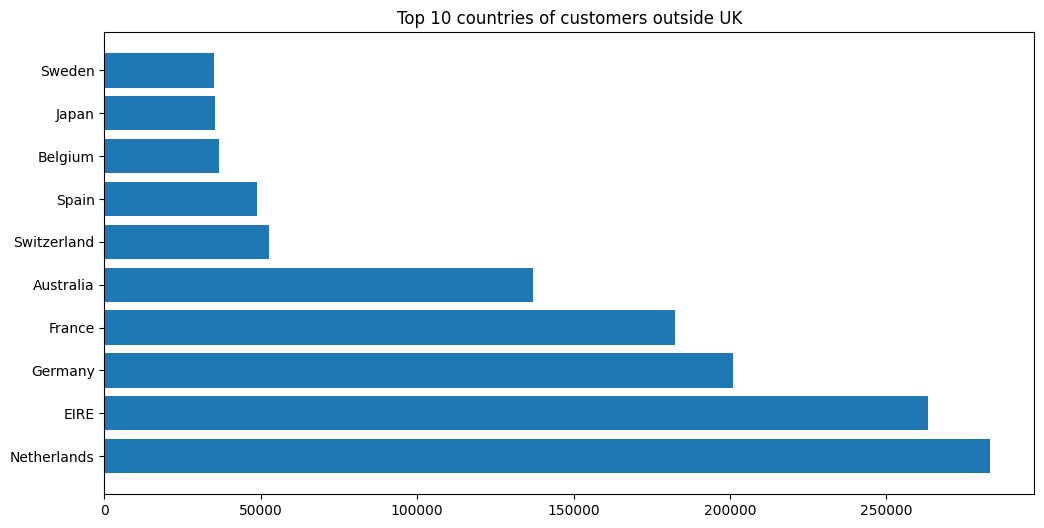

In [ ]:
plt.figure(figsize=(12, 6))
plt.barh(sales_by_countries[1:11].index, sales_by_countries[1:11].values)

plt.title('Top 10 countries of customers outside UK')
plt.show()

In [ ]:
# Number of unique customers by Country
unique_customer_count_by_countries = df.groupby('Country')['CustomerID'].nunique()
print(unique_customer_count_by_countries)

Country
Australia                  9
Austria                   11
Bahrain                    3
Belgium                   25
Brazil                     1
Canada                     4
Channel Islands            9
Cyprus                     8
Czech Republic             1
Denmark                    9
EIRE                       4
European Community         1
Finland                   12
France                    88
Germany                   95
Greece                     4
Hong Kong                  1
Iceland                    1
Israel                     5
Italy                     15
Japan                      8
Lebanon                    1
Lithuania                  1
Malta                      2
Netherlands                9
Norway                    10
Poland                     6
Portugal                  20
RSA                        1
Saudi Arabia               1
Singapore                  1
Spain                     31
Sweden                     8
Switzerland               22
USA   

In [ ]:
# unique_customer_count_by_countries.index
combined_df = pd.concat([sales_by_countries, unique_customer_count_by_countries], axis=1)
combined_df['OrdersPerCustomer'] = round(combined_df['Sales']/combined_df['CustomerID'])
combined_df.sort_values('OrdersPerCustomer', ascending=False)


,Sales,CustomerID,OrdersPerCustomer
Country,,,
EIRE,263276.820,4,65819.0
Netherlands,283167.540,9,31463.0
Australia,136990.000,9,15221.0
Hong Kong,9942.040,1,9942.0
Singapore,9120.390,1,9120.0
Japan,35340.620,8,4418.0
Sweden,35206.910,8,4401.0
Iceland,4310.000,1,4310.0
Norway,32292.960,10,3229.0


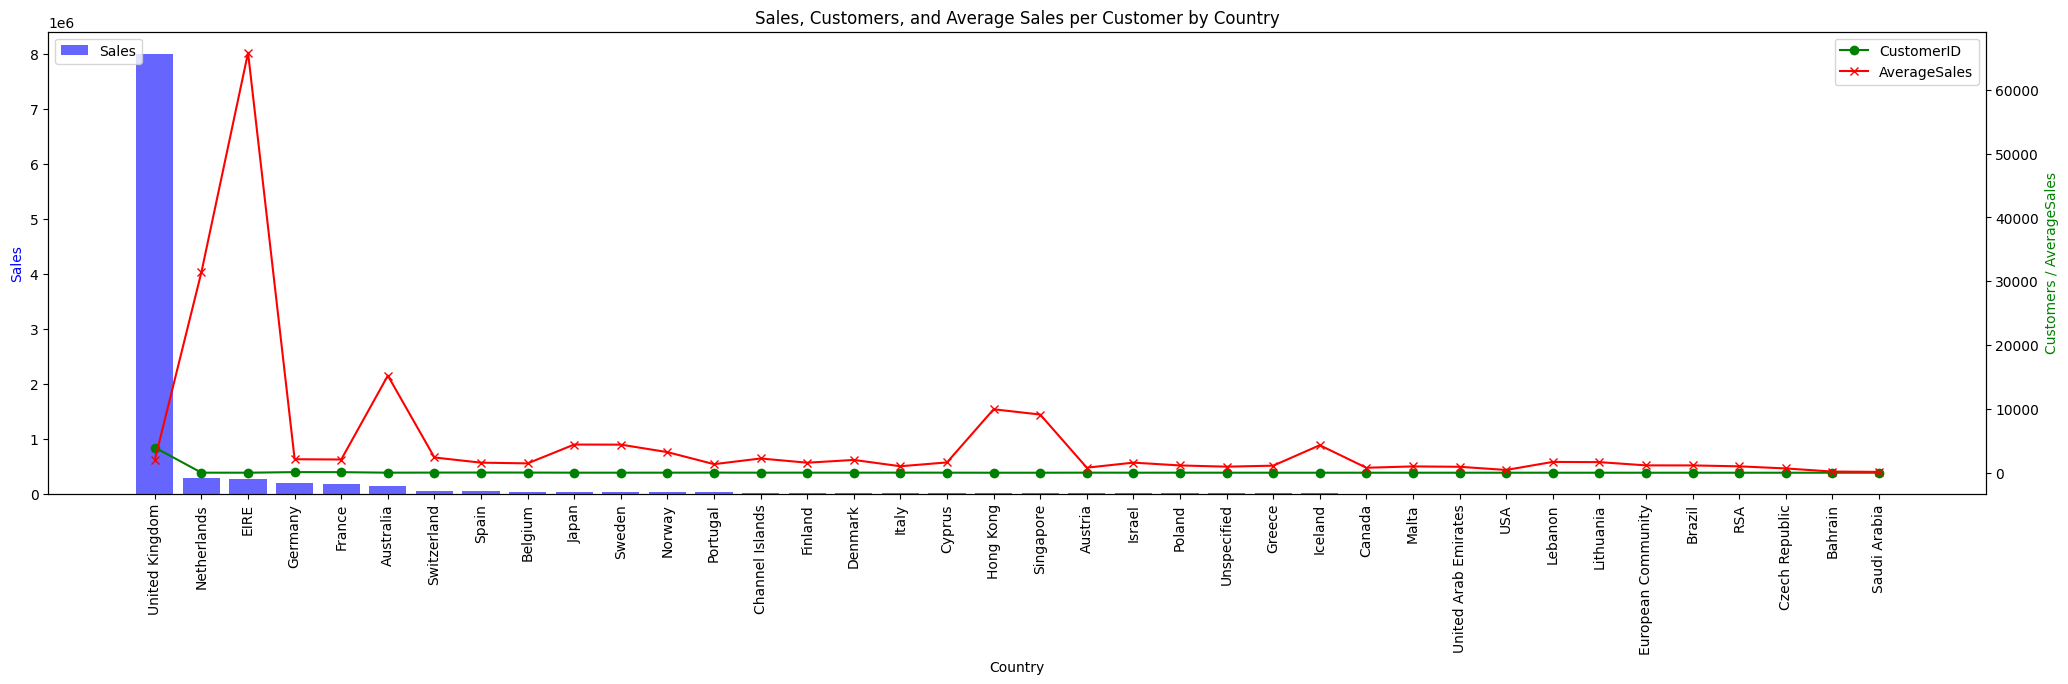

In [ ]:
fig, ax1 = plt.subplots(figsize=(25, 6))

ax1.bar(combined_df.index, combined_df['Sales'], color='b', alpha=0.6, label='Sales')

ax2 = ax1.twinx()
ax2.plot(combined_df.index, combined_df['CustomerID'], color='g', marker='o', label='CustomerID')
ax2.plot(combined_df.index, combined_df['OrdersPerCustomer'], color='r', marker='x', label='AverageSales')

ax1.set_xlabel('Country')
ax1.set_ylabel('Sales', color='b')
ax2.set_ylabel('Customers / AverageSales', color='g')
ax1.set_xticks(range(len(combined_df.index)))
ax1.set_xticklabels(combined_df.index, rotation=90)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Sales, Customers, and Average Sales per Customer by Country')
plt.show()

RESUME: Important markets outside the UK are - Netherlands, Ireland, Germany, France, Australia. Countries with a large number of orders per customer are potentially suitable for attracting new buyers - Asian region: Hongkong, Singapore, Japan.

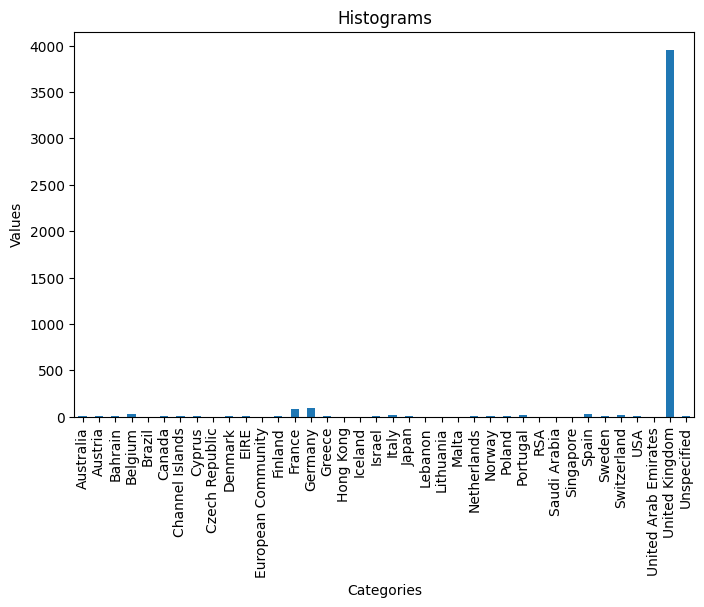

In [ ]:

ax = unique_customer_count_by_countries.plot(kind='bar', figsize=(8, 5))

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Histograms')
plt.show()

## 1.2. Segmentation by purchasing behavior

Total customers:




In [ ]:
len(df['CustomerID'].unique())

4373

Сreating a customer database, calculating group indicators and adding new various metrics

In [ ]:

customers = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',
    'Description': ['count', 'nunique'],
    'UnitPrice': ['max','min'],
    'Sales': 'sum',
    'Country': 'last'
}).reset_index()

customers.columns = ['CustomerID', 'UniqueInvoices', 'TotalProducts', 'UniqueProducts', 'MaxPrice', 'MinPrice', 'TotalSales', 'Country']

customers

,CustomerID,UniqueInvoices,TotalProducts,UniqueProducts,MaxPrice,MinPrice,TotalSales,Country
0,1,2989,133635,3365,17836.46,0.00,1275946.72,United Kingdom
1,12346,2,2,1,1.04,1.04,0.00,United Kingdom
2,12347,7,182,103,12.75,0.25,4310.00,Iceland
3,12348,4,27,21,1.45,0.29,1437.24,Finland
4,12349,1,72,72,39.95,0.42,1457.55,Italy
...,...,...,...,...,...,...,...,...
4368,18280,1,10,10,9.95,2.55,180.60,United Kingdom
4369,18281,1,7,7,16.95,0.42,80.82,United Kingdom
4370,18282,3,13,12,12.75,0.29,176.60,United Kingdom
4371,18283,16,756,263,15.95,0.29,2094.88,United Kingdom


Grouping by CustomerID and counting - the average number of goods by invoice

In [ ]:
grouped = df.groupby(['CustomerID', 'InvoiceNo']).agg({
    'Description': 'count',
}).reset_index()

grouped2 = grouped.groupby('CustomerID').agg({
    'Description': 'mean',
}).reset_index()

grouped2.columns = ['CustomerID', 'AvgQuantityPerInvoice']

grouped2


,CustomerID,AvgQuantityPerInvoice
0,1,44.708933
1,12346,1.000000
2,12347,26.000000
3,12348,6.750000
4,12349,72.000000
...,...,...
4368,18280,10.000000
4369,18281,7.000000
4370,18282,4.333333
4371,18283,47.250000


In [ ]:
customers['AvgQuantityPerInvoice'] = grouped2['AvgQuantityPerInvoice']
customers

,CustomerID,UniqueInvoices,TotalProducts,UniqueProducts,MaxPrice,MinPrice,TotalSales,Country,AvgQuantityPerInvoice
0,1,2989,133635,3365,17836.46,0.00,1275946.72,United Kingdom,44.708933
1,12346,2,2,1,1.04,1.04,0.00,United Kingdom,1.000000
2,12347,7,182,103,12.75,0.25,4310.00,Iceland,26.000000
3,12348,4,27,21,1.45,0.29,1437.24,Finland,6.750000
4,12349,1,72,72,39.95,0.42,1457.55,Italy,72.000000
...,...,...,...,...,...,...,...,...,...
4368,18280,1,10,10,9.95,2.55,180.60,United Kingdom,10.000000
4369,18281,1,7,7,16.95,0.42,80.82,United Kingdom,7.000000
4370,18282,3,13,12,12.75,0.29,176.60,United Kingdom,4.333333
4371,18283,16,756,263,15.95,0.29,2094.88,United Kingdom,47.250000


In [ ]:
customers['AvgWeightedPrice'] = customers['TotalSales']/customers['TotalProducts']
customers

,CustomerID,UniqueInvoices,TotalProducts,UniqueProducts,MaxPrice,MinPrice,TotalSales,Country,AvgQuantityPerInvoice,AvgWeightedPrice
0,1,2989,133635,3365,17836.46,0.00,1275946.72,United Kingdom,44.708933,9.547998
1,12346,2,2,1,1.04,1.04,0.00,United Kingdom,1.000000,0.000000
2,12347,7,182,103,12.75,0.25,4310.00,Iceland,26.000000,23.681319
3,12348,4,27,21,1.45,0.29,1437.24,Finland,6.750000,53.231111
4,12349,1,72,72,39.95,0.42,1457.55,Italy,72.000000,20.243750
...,...,...,...,...,...,...,...,...,...,...
4368,18280,1,10,10,9.95,2.55,180.60,United Kingdom,10.000000,18.060000
4369,18281,1,7,7,16.95,0.42,80.82,United Kingdom,7.000000,11.545714
4370,18282,3,13,12,12.75,0.29,176.60,United Kingdom,4.333333,13.584615
4371,18283,16,756,263,15.95,0.29,2094.88,United Kingdom,47.250000,2.771005


Deleting non-personal data ('NaN-customers')

In [ ]:
customers = customers.drop(0)


Final customer's database

In [ ]:
customers

,CustomerID,UniqueInvoices,TotalProducts,UniqueProducts,MaxPrice,MinPrice,TotalSales,Country,AvgQuantityPerInvoice,AvgWeightedPrice
1,12346,2,2,1,1.04,1.04,0.00,United Kingdom,1.000000,0.000000
2,12347,7,182,103,12.75,0.25,4310.00,Iceland,26.000000,23.681319
3,12348,4,27,21,1.45,0.29,1437.24,Finland,6.750000,53.231111
4,12349,1,72,72,39.95,0.42,1457.55,Italy,72.000000,20.243750
5,12350,1,16,16,2.95,0.85,294.40,Norway,16.000000,18.400000
...,...,...,...,...,...,...,...,...,...,...
4368,18280,1,10,10,9.95,2.55,180.60,United Kingdom,10.000000,18.060000
4369,18281,1,7,7,16.95,0.42,80.82,United Kingdom,7.000000,11.545714
4370,18282,3,13,12,12.75,0.29,176.60,United Kingdom,4.333333,13.584615
4371,18283,16,756,263,15.95,0.29,2094.88,United Kingdom,47.250000,2.771005


Correlations beetween columns

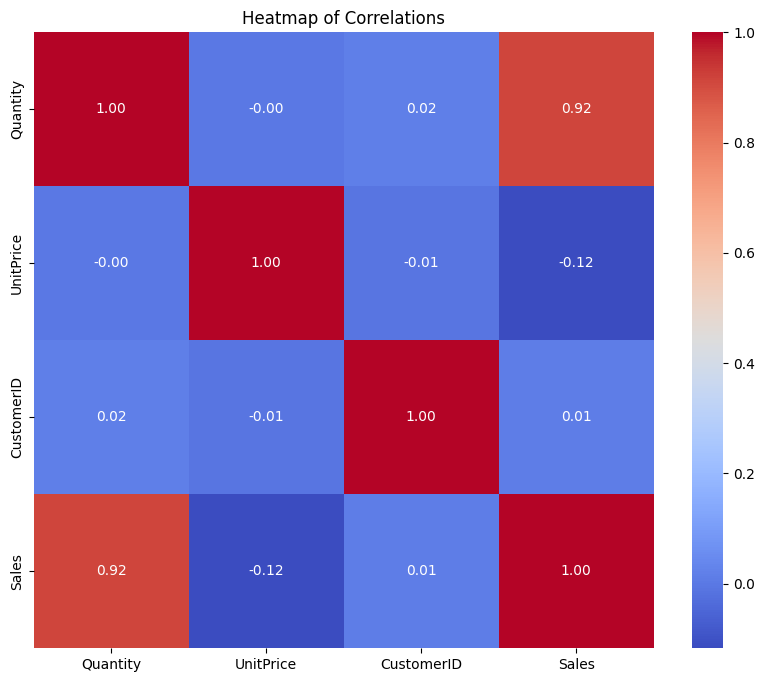

In [191]:
numeric_df = df.select_dtypes(include=[float, int])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Correlations")
plt.show()

RESUME: We see only a strong correlation between sales and assortment

## 1.3. Clusterizations (Segmentation by ML)

**2D-clustering (3 clusters)**

We will conduct cluster analysis using machine learning for two factors - sales volume and item's amount per order

We will first normalize data with Min-Max standartization

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = customers[['TotalSales', 'AvgQuantityPerInvoice']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3)

kmeans.fit(scaled_features)
clusters = kmeans.predict(scaled_features)

customers['cluster'] = clusters
customers3=customers.copy()
customers3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,UniqueInvoices,TotalProducts,UniqueProducts,MaxPrice,MinPrice,TotalSales,Country,AvgQuantityPerInvoice,AvgWeightedPrice,cluster
1,12346,2,2,1,1.04,1.04,0.00,United Kingdom,1.000000,0.000000,0
2,12347,7,182,103,12.75,0.25,4310.00,Iceland,26.000000,23.681319,0
3,12348,4,27,21,1.45,0.29,1437.24,Finland,6.750000,53.231111,0
4,12349,1,72,72,39.95,0.42,1457.55,Italy,72.000000,20.243750,1
5,12350,1,16,16,2.95,0.85,294.40,Norway,16.000000,18.400000,0
...,...,...,...,...,...,...,...,...,...,...,...
4368,18280,1,10,10,9.95,2.55,180.60,United Kingdom,10.000000,18.060000,0
4369,18281,1,7,7,16.95,0.42,80.82,United Kingdom,7.000000,11.545714,0
4370,18282,3,13,12,12.75,0.29,176.60,United Kingdom,4.333333,13.584615,0
4371,18283,16,756,263,15.95,0.29,2094.88,United Kingdom,47.250000,2.771005,1


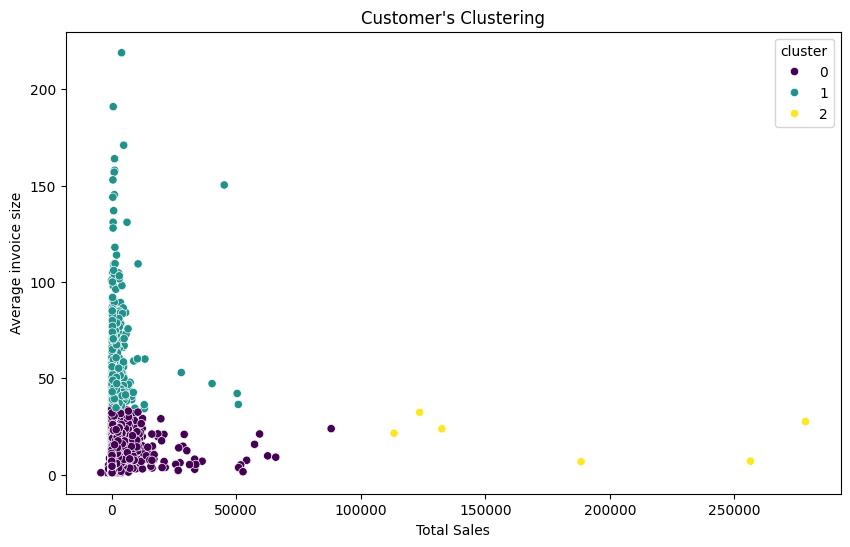

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customers3, x='TotalSales', y='AvgQuantityPerInvoice', hue='cluster', palette='viridis')
plt.title("Customer's Clustering")
plt.xlabel('Total Sales')
plt.ylabel('Average invoice size')
plt.show()

<Figure size 2000x600 with 0 Axes>

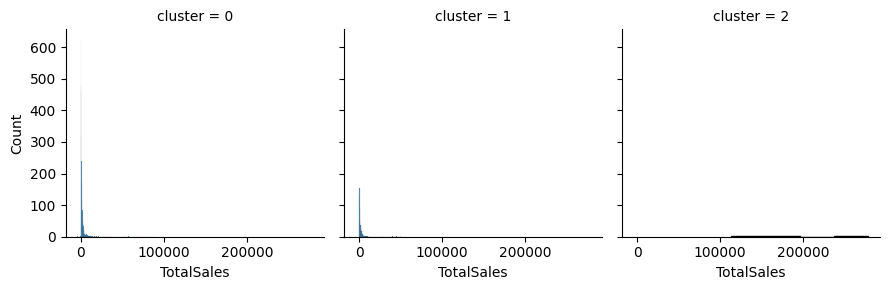

In [ ]:
plt.figure(figsize=(20, 6))
g = sns.FacetGrid(customers3, col="cluster")
g.map(sns.histplot, "TotalSales")

We got three clusters - three customer's segments:


*  **SEGMENT 1 (cluster 0):**

Low Total Sales - Low Average Basket

The main part of retail buyers buy a small and limited assortment, but make up the bulk of buyers and the bulk of revenue

MARKETING STRATEGY: offer new products that the consumer has not yet purchased or tried. Give free samples and giveaways


*  **SEGMENT 2 (cluster 1):**
Low Total Sales - High Average Basket

Also an important part of customers who buy a large assortment but a small sales volume.

MARKETING STRATEGY: it is necessary to offer them discounts on the volume of purchases to stimulate large sales


*  **SEGMENT 3 (cluster 2):**
High Total Sales - Low Average Basket

Most profitability customers (apparently wholesale buyers) only 6 consumers (0.1%) bring in 13% of sales

MARKETING STRATEGY: targeted communications, special manager, special pricing policy



Counting customers in each cluster

In [ ]:
segment3 = customers3.groupby('cluster') ['CustomerID'].count()
segment3

cluster
0    3721
1     645
2       6
Name: CustomerID, dtype: int64

In [ ]:
segment3sales = customers3.groupby('cluster') ['TotalSales'].sum()
segment3sales

cluster
0    5936110.383
1    1192418.811
2    1092920.020
Name: TotalSales, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

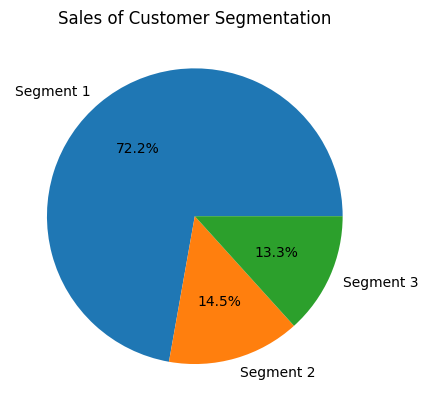

In [ ]:
plt.pie(segment3sales, labels=['Segment 1', 'Segment 2', 'Segment 3' ], autopct='%1.1f%%')
plt.title('Sales of Customer Segmentation')
plt.show

<ipython-input-166-3ed0e3d9f4ef>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = customers3.groupby('cluster').mean()


Text(0.5, 1.0, 'AVERAGE VALUES BY CLUSTERS')

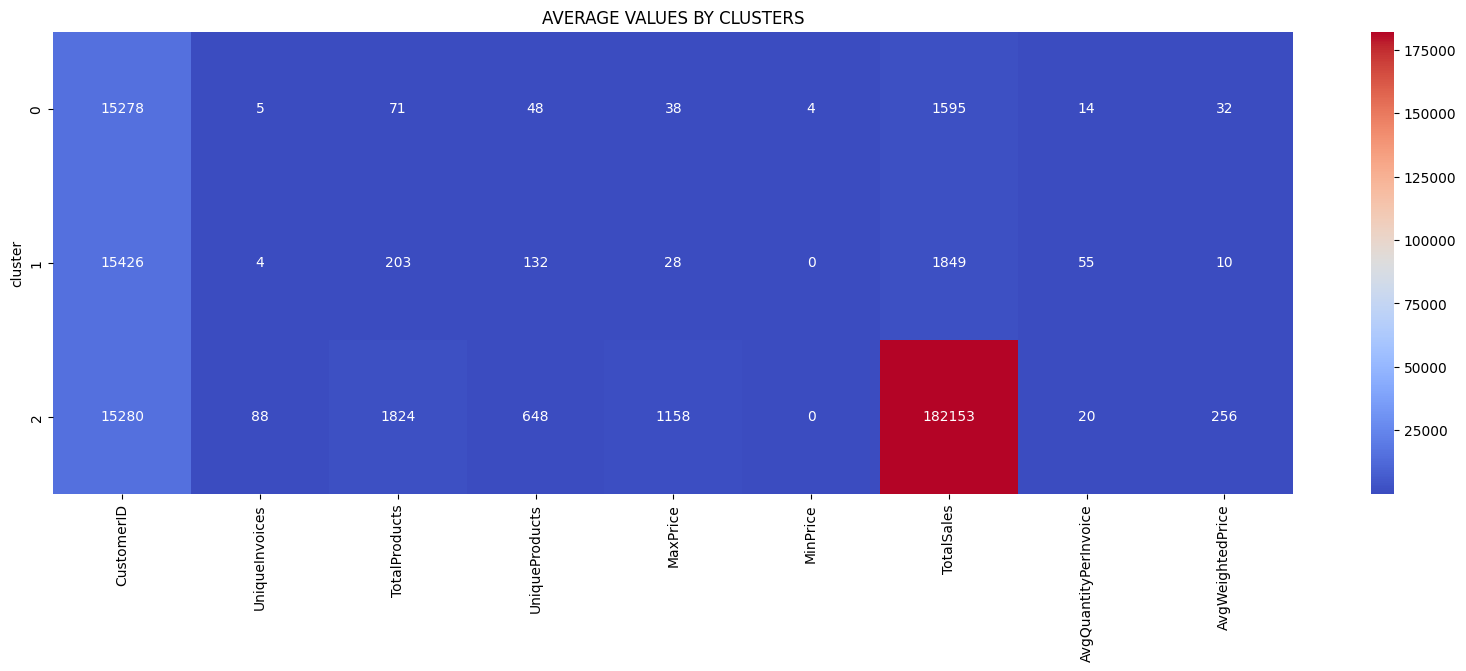

In [ ]:
cluster_means = customers3.groupby('cluster').mean()

plt.figure(figsize=(20, 6))

sns.heatmap(cluster_means, annot=True, cmap='coolwarm', fmt='.0f')
plt.title('AVERAGE VALUES BY CLUSTERS')

**3D-clustering and 4 clusters**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = customers[['TotalSales', 'AvgQuantityPerInvoice', 'UniqueInvoices']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4)

kmeans.fit(scaled_features)
clusters = kmeans.predict(scaled_features)

customers['cluster'] = clusters
customers4 = customers.copy()
customers4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,UniqueInvoices,TotalProducts,UniqueProducts,MaxPrice,MinPrice,TotalSales,Country,AvgQuantityPerInvoice,AvgWeightedPrice,cluster
1,12346,2,2,1,1.04,1.04,0.00,United Kingdom,1.000000,0.000000,0
2,12347,7,182,103,12.75,0.25,4310.00,Iceland,26.000000,23.681319,0
3,12348,4,27,21,1.45,0.29,1437.24,Finland,6.750000,53.231111,0
4,12349,1,72,72,39.95,0.42,1457.55,Italy,72.000000,20.243750,2
5,12350,1,16,16,2.95,0.85,294.40,Norway,16.000000,18.400000,0
...,...,...,...,...,...,...,...,...,...,...,...
4368,18280,1,10,10,9.95,2.55,180.60,United Kingdom,10.000000,18.060000,0
4369,18281,1,7,7,16.95,0.42,80.82,United Kingdom,7.000000,11.545714,0
4370,18282,3,13,12,12.75,0.29,176.60,United Kingdom,4.333333,13.584615,0
4371,18283,16,756,263,15.95,0.29,2094.88,United Kingdom,47.250000,2.771005,2


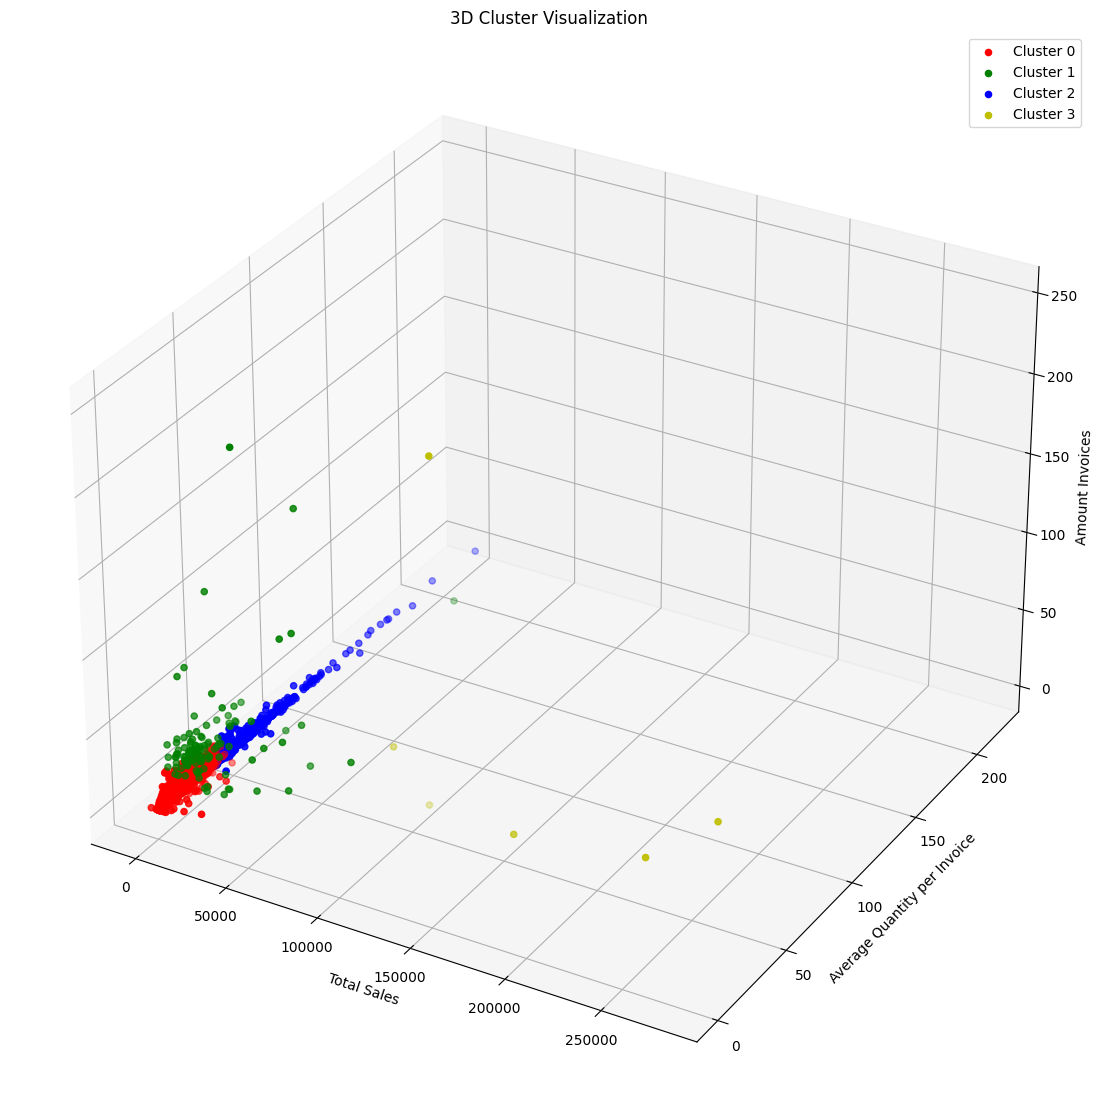

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111, projection='3d')

x = customers4['TotalSales']
y = customers4['AvgQuantityPerInvoice']
z = customers4['UniqueInvoices']
clusters = customers4['cluster']

colors = ['r', 'g', 'b', 'y']

for i in range(kmeans.n_clusters):
    ax.scatter(x[clusters == i], y[clusters == i], z[clusters == i], c=colors[i], label=f'Cluster {i}')

ax.set_xlabel('Total Sales')
ax.set_ylabel('Average Quantity per Invoice')
ax.set_zlabel('Amount Invoices')

plt.title('3D Cluster Visualization')
plt.legend()

plt.show()

Cluster 0:
Low Total Sales, Low Average Quantity, Low Number of Invoices

Customers in this cluster might make purchases infrequently and in small quantities. They could be casual or new buyers.
They might represent a segment that requires additional engagement to increase purchase frequency and volume.

Cluster 1: High Total Sales, Medium or High Average Quantity pf Items
This cluster might represent large clients or wholesalers who make numerous purchases but with a varied assortment of items in each transaction.
Such clients could be highly valuable for the company in terms of overall sales volume.

Cluster 2: Medium or Low Total Sales, Medium Average Quantity, Medium ir High Number of Orders

This cluster could include customers who buy infrequently but purchase large quantities each time.
They might represent seasonal demand or specialized bulk purchases.

Cluster 3: Low Total Sales, High Average Quantity of Items, Low Number of Orders

This cluster could include regular customers who consistently make large purchases.
They could be loyal customers with a high potential for long-term relationships and represent a significant portion of the company's total sales.

**Distribution of customers by numbers of orders without outliers (More than 3 orders, Less than 2900)**

> Indented block






In [ ]:
sorted_df = customers.sort_values(by='UniqueInvoices', ascending=False)
sorted_df = sorted_df[(sorted_df['UniqueInvoices'] < 2900) & (sorted_df['UniqueInvoices'] > 3)]
sorted_df



,CustomerID,UniqueInvoices,TotalProducts,UniqueProducts,MaxPrice,MinPrice,TotalSales,Country,AvgQuantityPerInvoice,AvgWeightedPrice,cluster
1896,14911,248,5903,1761,1687.17,0.00,132572.62,EIRE,23.802419,22.458516,2
331,12748,222,4639,1739,1829.84,0.04,29148.10,United Kingdom,20.896396,6.283272,1
4043,17841,169,7983,1318,39.95,0.04,40340.78,United Kingdom,47.236686,5.053336,0
1675,14606,127,2781,825,85.00,0.12,11593.85,United Kingdom,21.897638,4.168950,1
2193,15311,118,2491,563,14.95,0.12,59419.34,United Kingdom,21.110169,23.853609,1
...,...,...,...,...,...,...,...,...,...,...,...
2944,16330,4,41,39,8.50,0.12,242.21,United Kingdom,10.250000,5.907561,1
429,12885,4,72,66,16.95,0.42,1158.27,United Kingdom,18.000000,16.087083,1
1254,14034,4,92,82,21.95,0.29,512.02,United Kingdom,23.000000,5.565435,1
2674,15965,4,122,88,8.50,0.39,845.64,United Kingdom,30.500000,6.931475,1


<function matplotlib.pyplot.show(close=None, block=None)>

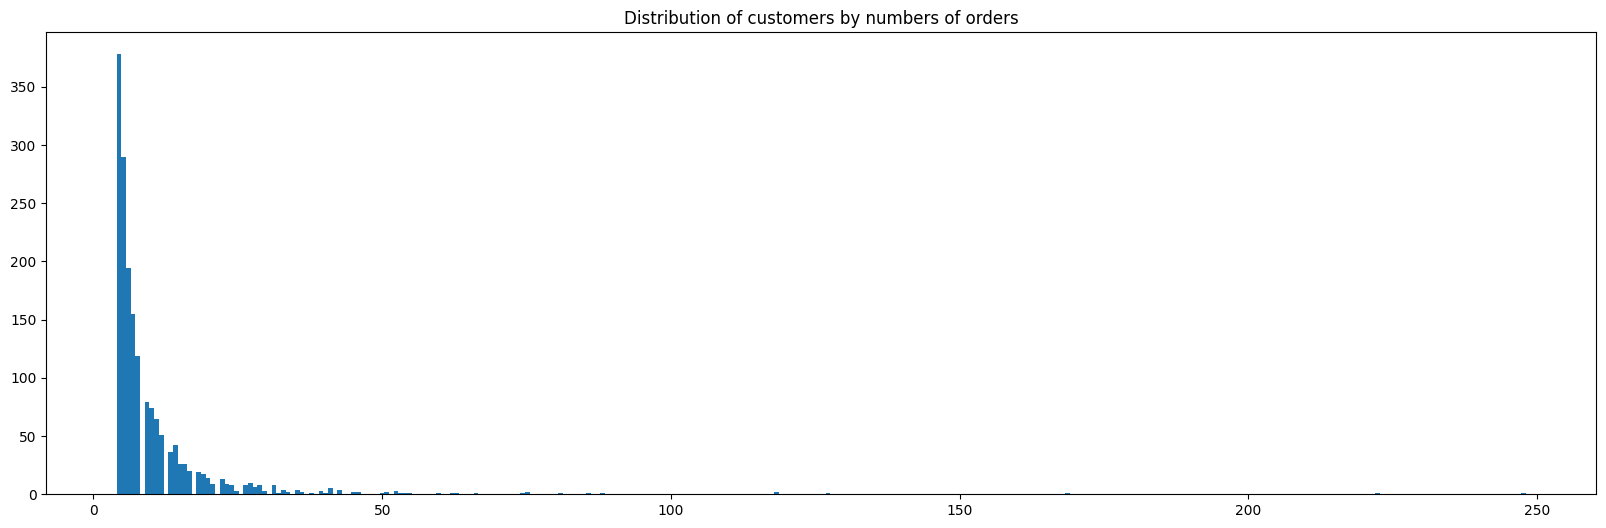

In [ ]:

plt.figure(figsize=(20, 6))
plt.hist(sorted_df['UniqueInvoices'], bins=300)
plt.title('Distribution of customers by numbers of orders')
plt.show

In [ ]:
grouped = df.groupby(['CustomerID', 'InvoiceNo']).agg({
    'Description': 'count',
}).reset_index()
grouped

,CustomerID,InvoiceNo,Description
0,1,536414,1
1,1,536544,526
2,1,536555,2
3,1,536558,1
4,1,536565,2
...,...,...,...
25055,18283,579673,52
25056,18283,580872,50
25057,18287,554065,29
25058,18287,570715,38


In [ ]:
cust_grouping = customers.groupby('CustomerID').sum()[['TotalSales']]



<ipython-input-56-3c98773ae5b4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cust_grouping = customers.groupby('CustomerID').sum()[['TotalSales']]


In [ ]:
cust_grouping.sort_values(by='TotalSales', ascending=False)
top20cust = cust_grouping.sort_values(by='TotalSales', ascending=False)
top20cust

,TotalSales
CustomerID,
14646,278466.02
18102,256438.49
17450,188420.57
14911,132572.62
12415,123638.18
...,...
12503,-1126.00
17603,-1165.30
14213,-1192.20


## 1.4. Segmentation by products



Range of items

In [ ]:
len(df['Description'].unique())


3761

Top selling products

In [ ]:
items_grouping = df.groupby('Description')[['Sales']].sum()
items_grouping.sort_values(by='Sales', ascending=False).head(20)

,Sales
Description,
REGENCY CAKESTAND 3 TIER,164762.19
PARTY BUNTING,98302.98
CREAM HANGING HEART T-LIGHT HOLDER,97894.50
JUMBO BAG RED RETROSPOT,92356.03
RABBIT NIGHT LIGHT,66756.59
PAPER CHAIN KIT 50'S CHRISTMAS,63791.94
ASSORTED COLOUR BIRD ORNAMENT,58959.73
CHILLI LIGHTS,53768.06
PICNIC BASKET WICKER SMALL,51041.37


In [ ]:
items = df.groupby('Description').agg(
    StockCode=('StockCode', 'first'),
    Count=('Description', 'count'),
    Total_Quantity=('Quantity', 'sum'),
    Unique_UnitPrices=('UnitPrice', lambda x: list(x.unique())),
    Unique_CustomerID_Count=('CustomerID', lambda x: x.nunique()),
    Total_Sales=('Sales', 'sum')
)

items.head(30)

,StockCode,Count,Total_Quantity,Unique_UnitPrices,Unique_CustomerID_Count,Total_Sales
Description,,,,,,
4 PURPLE FLOCK DINNER CANDLES,72800B,41,144,"[2.55, 5.06, 4.96, 0.79]",32,290.80
50'S CHRISTMAS GIFT BAG LARGE,23437,132,1937,"[1.25, 2.46, 1.04]",109,2371.13
DOLLY GIRL BEAKER,23345,181,2448,"[1.25, 2.46, 1.08]",102,2882.50
I LOVE LONDON MINI BACKPACK,23391,89,390,"[4.15, 3.75, 8.29]",59,1632.32
NINE DRAWER OFFICE TIDY,23472,34,59,"[14.95, 29.13, 12.5]",30,909.37
OVAL WALL MIRROR DIAMANTE,22167,162,233,"[20.38, 8.47, 9.95, 8.29, 19.96, 3.95, 0.0]",42,2351.32
RED SPOT GIFT BAG LARGE,23438,111,1823,"[1.25, 2.46, 1.04]",89,2227.42
SPACEBOY BABY GIFT SET,23007,188,493,"[16.95, 14.95, 24.96, 10.79]",111,7657.00
TRELLIS COAT RACK,23411,58,226,"[4.95, 10.79, 4.15]",43,1113.66


# .2. Product Recommendation System:

General recommendation for each customer is list of most popular productsin store:


In [ ]:
items_grouping.sort_values(by='Sales', ascending=False).head(20)

,Sales
Description,
REGENCY CAKESTAND 3 TIER,164762.19
PARTY BUNTING,98302.98
CREAM HANGING HEART T-LIGHT HOLDER,97894.50
JUMBO BAG RED RETROSPOT,92356.03
RABBIT NIGHT LIGHT,66756.59
PAPER CHAIN KIT 50'S CHRISTMAS,63791.94
ASSORTED COLOUR BIRD ORNAMENT,58959.73
CHILLI LIGHTS,53768.06
PICNIC BASKET WICKER SMALL,51041.37


Searching for the most frequently purchased items in one invoice. The list of related products can be used in personal recommendations with the consumer

In [177]:
from itertools import combinations
from collections import Counter

grouped3 = df.groupby('InvoiceNo')['Description'].apply(list)

pair_counts = Counter()

for items in grouped3:
    for item_pair in combinations(items, 2):
        pair_counts[item_pair] += 1

sorted_pairs = sorted(pair_counts.items(), key=lambda x: x[1], reverse=True)

Pair: ('check', 'check'), Count: 1242


In [179]:
sorted_pairs

[(('check', 'check'), 1242),
 (('damaged', 'check'), 896),
 (('check', 'damaged'), 762),
 (('damaged', 'damaged'), 690),
 (('GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'), 617),
 (('check', 'JUMBO BAG RED RETROSPOT'), 553),
 (('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'), 544),
 (('check', 'CREAM HANGING HEART T-LIGHT HOLDER'), 539),
 (('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '),
  533),
 (('JUMBO SHOPPER VINTAGE RED PAISLEY', 'JUMBO BAG RED RETROSPOT'), 467),
 (('JUMBO STORAGE BAG SUKI', 'JUMBO BAG RED RETROSPOT'), 458),
 (('LUNCH BAG RED RETROSPOT', 'LUNCH BAG  BLACK SKULL.'), 443),
 (('adjustment', 'check'), 435),
 (('PACK OF 72 RETROSPOT CAKE CASES', 'check'), 434),
 (('PINK REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '), 419),
 (('SUKI  SHOULDER BAG', 'check'), 418),
 (('MODERN FLORAL STATIONERY SET', 'check'), 412),
 (('check', 'JAM MAKING SET PRINTED'), 401),
 (('ALARM CLOCK BAKELIKE GREEN', 'ALARM CLOCK

## Inventory analysis - Returns analysing

In [ ]:
returns = df[df['Sales'] <0]
returns

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Month
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50,December
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65,December
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80,December
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96,December
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96,December
...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,-9.13,December
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,-224.69,December
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,-54.75,December
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,-1.25,December


In [ ]:
returnsbyquantity = returns.groupby('Description')['Quantity'].sum()
returnsbyquantity.sort_values(ascending=True).head(20)

Description
PAPER CRAFT , LITTLE BIRDIE           -80995
MEDIUM CERAMIC TOP STORAGE JAR        -74494
ROTATING SILVER ANGELS T-LIGHT HLDR    -9376
Manual                                 -4066
FAIRY CAKE FLANNEL ASSORTED COLOUR     -3150
PINK BLUE FELT CRAFT TRINKET BOX       -2617
CREAM HANGING HEART T-LIGHT HOLDER     -2578
GIN AND TONIC DIET METAL SIGN          -2030
HERB MARKER BASIL                      -1527
FELTCRAFT DOLL MOLLY                   -1447
TEA TIME PARTY BUNTING                 -1424
PAPER POCKET TRAVELING FAN             -1385
COLOURED GLASS STAR T-LIGHT HOLDER     -1228
check                                  -1212
WORLD WAR 2 GLIDERS ASSTD DESIGNS      -1200
Discount                               -1194
JUMBO BAG RED RETROSPOT                -1115
HOME SWEET HOME MUG                    -1052
PANTRY CHOPPING BOARD                   -946
PLACE SETTING WHITE HEART               -890
Name: Quantity, dtype: int64

In [ ]:
returnsbysum = returns.groupby('Description')['Sales'].sum()
returnsbysum.sort_values(ascending=True).head(20)

Description
PAPER CRAFT , LITTLE BIRDIE          -168469.60
Manual                               -146784.46
MEDIUM CERAMIC TOP STORAGE JAR        -77479.64
REGENCY CAKESTAND 3 TIER               -9722.55
CRUK Commission                        -7933.43
CREAM HANGING HEART T-LIGHT HOLDER     -6624.30
FAIRY CAKE FLANNEL ASSORTED COLOUR     -6591.42
Discount                               -5696.22
PANTRY CHOPPING BOARD                  -4803.06
DOORMAT FAIRY CAKE                     -4554.90
GIN AND TONIC DIET METAL SIGN          -3775.33
TEA TIME PARTY BUNTING                 -3692.95
FELTCRAFT DOLL MOLLY                   -3512.65
COLOURED GLASS STAR T-LIGHT HOLDER     -3443.62
SAMPLES                                -3112.44
PINK BLUE FELT CRAFT TRINKET BOX       -2778.77
IVORY DINER WALL CLOCK                 -2653.70
RED RETROSPOT CAKE STAND               -2480.50
JUMBO BAG RED RETROSPOT                -1984.02
check                                  -1977.09
Name: Sales, dtype: float64

RESUME: They need to pay attention to these top list of products that were often returned by customers

Checking that one Invoice is for one Customer

In [ ]:
df.groupby('InvoiceNo')['CustomerID'].unique().sample(50)

InvoiceNo
551731     [14307]
578521     [17812]
538345     [13787]
577851     [13267]
C558465    [13418]
575210     [14732]
579750     [13536]
571281     [14088]
579413     [13668]
C562992    [12885]
568874     [14524]
561799     [15776]
541370     [18179]
566675     [15105]
574091     [17086]
545082     [16992]
566264     [14606]
573865     [15311]
576508     [17777]
562616     [14748]
545875         [1]
577115         [1]
578359     [14607]
546984     [15019]
556786     [13408]
576566         [1]
C547368    [16809]
544918     [13081]
573840     [14866]
572233     [14646]
557643         [1]
553526     [16266]
560427         [1]
561695     [14005]
563264     [13720]
563098     [14911]
538497     [14684]
537841     [13848]
573329     [14810]
546537     [15005]
560244     [16931]
546915     [15695]
569868     [13018]
555008     [17061]
536972     [16926]
559921     [13667]
578067         [1]
539019     [17551]
547076     [15140]
546394     [17164]
Name: CustomerID, dtype: object

# .3. Customer Lifetime Value (CLV) Analysis:

Customer Lifetime Value (CLV) Analysis is a method of estimating the potential profitability of a customer throughout their interaction with a business.

Key metrics for each segment and then develop strategies to maximize CLV.

The approach to CLV involves analyzing parameters such as Average Revenue Per User (ARPU), purchase frequency, margin, and the lifespan of a customer.


For each segment (cluster), we can calculate the following:

1. Average Revenue Per User (ARPU): This is the average revenue a company earns from an individual customer over a certain period. It can be calculated as total revenue (TotalSales) divided by the number of unique customers in the cluster.
2. Average Purchase Frequency: How often, on average, customers make purchases. 'UniqueInvoices' can be used to gauge this metric.
3. Average Customer Lifespan: An estimate of the time during which a customer remains active. (on chapter 4. Time-Series Analysis)


In [184]:
clv_df = df.groupby('CustomerID')['Sales'].sum().reset_index()
clv_df.drop(index=0, inplace=True)
clv_df

,CustomerID,Sales
1,12346,0.00
2,12347,4310.00
3,12348,1437.24
4,12349,1457.55
5,12350,294.40
...,...,...
4368,18280,180.60
4369,18281,80.82
4370,18282,176.60
4371,18283,2094.88


In [185]:
clv_df.columns = ['CustomerID', 'TotalSales']

In [186]:
mean_clv = clv_df['TotalSales'].mean()
median_clv = clv_df['TotalSales'].median()
max_clv = clv_df['TotalSales'].max()
min_clv = clv_df['TotalSales'].min()

print(f"Mean CLV: {mean_clv}")
print(f"Median CLV: {median_clv}")
print(f"Max CLV: {max_clv}")
print(f"Min CLV: {min_clv}")

Mean CLV: 1880.4401219121685
Median CLV: 642.805
Max CLV: 278466.02
Min CLV: -4287.63


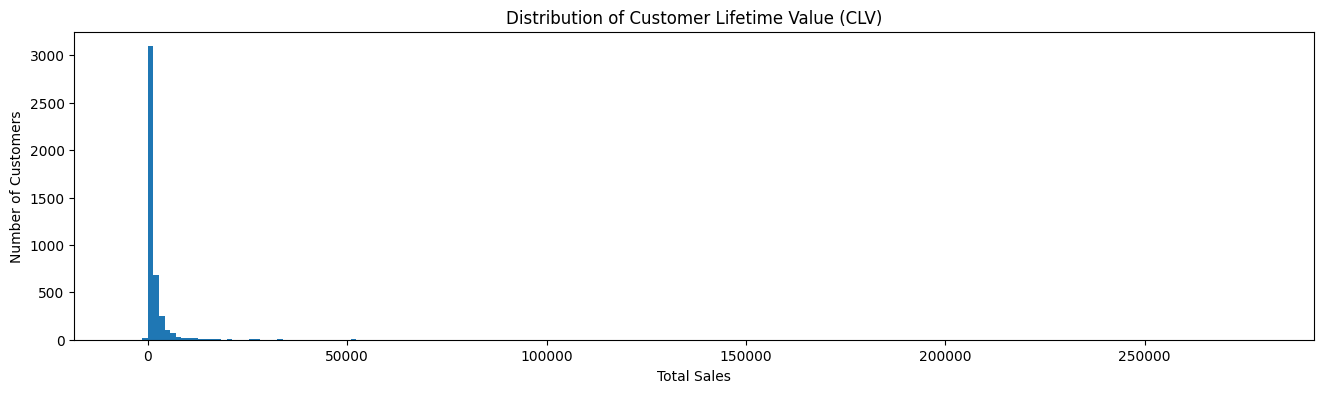

In [188]:
plt.figure(figsize=(16, 4))

plt.hist(clv_df['TotalSales'], bins=200)
plt.xlabel('Total Sales')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Lifetime Value (CLV)')
plt.show()


CLV by clusters

   Cluster       Mean CLV  Median CLV    Max CLV       Min CLV
0        0    1595.299754     605.630   88127.55 -4.287630e+03
1        1    1848.711335     826.530   50862.44  3.552714e-15
2        2  182153.336667  160496.595  278466.02  1.133841e+05


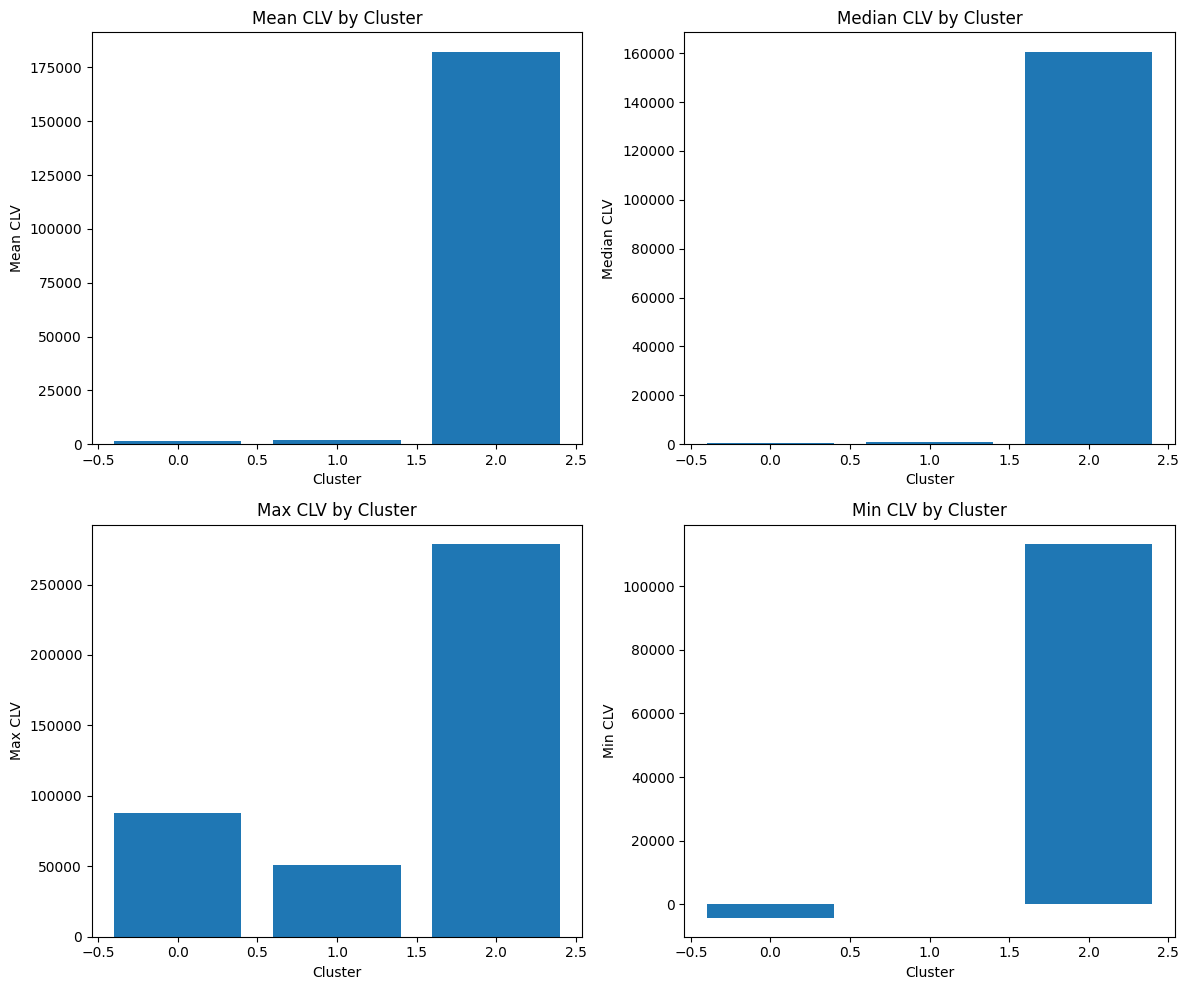

In [189]:

clv_metrics = customers3.groupby('cluster')['TotalSales'].agg(['mean', 'median', 'max', 'min']).reset_index()

clv_metrics.columns = ['Cluster', 'Mean CLV', 'Median CLV', 'Max CLV', 'Min CLV']

print(clv_metrics)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].bar(clv_metrics['Cluster'], clv_metrics['Mean CLV'])
axs[0, 0].set_title('Mean CLV by Cluster')
axs[0, 0].set_xlabel('Cluster')
axs[0, 0].set_ylabel('Mean CLV')

# Median CLV
axs[0, 1].bar(clv_metrics['Cluster'], clv_metrics['Median CLV'])
axs[0, 1].set_title('Median CLV by Cluster')
axs[0, 1].set_xlabel('Cluster')
axs[0, 1].set_ylabel('Median CLV')

# Max CLV
axs[1, 0].bar(clv_metrics['Cluster'], clv_metrics['Max CLV'])
axs[1, 0].set_title('Max CLV by Cluster')
axs[1, 0].set_xlabel('Cluster')
axs[1, 0].set_ylabel('Max CLV')

# Min CLV
axs[1, 1].bar(clv_metrics['Cluster'], clv_metrics['Min CLV'])
axs[1, 1].set_title('Min CLV by Cluster')
axs[1, 1].set_xlabel('Cluster')
axs[1, 1].set_ylabel('Min CLV')

plt.tight_layout()
plt.show()


# .4. Time-Series Analysis for Seasonal Trends:

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.strftime('%B')

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

customer_monthly_sales = df.groupby(['CustomerID', 'Month'])['Sales'].sum().unstack(fill_value=0)
customer_monthly_sales = customer_monthly_sales.reindex(columns=month_order, fill_value=0)

customer_monthly_sales['Total'] = customer_monthly_sales.sum(axis=1)
# customer_monthly_sales = customer_monthly_sales.drop(1)
customer_monthly_sales

Month,January,February,March,April,May,June,July,August,September,October,November,December,Total
CustomerID,,,,,,,,,,,,,
1,105409.30,63250.11,102917.97,60099.58,78464.24,82126.57,105120.03,98150.67,88065.34,96584.90,312326.09,312293.06,1504807.86
12346,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
12347,475.39,0.00,0.00,636.25,0.00,382.52,0.00,584.91,0.00,1294.32,0.00,936.61,4310.00
12348,187.44,0.00,0.00,327.00,0.00,0.00,0.00,0.00,270.00,0.00,0.00,652.80,1437.24
12349,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1457.55,0.00,1457.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,0.00,0.00,180.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,180.60
18281,0.00,0.00,0.00,0.00,0.00,80.82,0.00,0.00,0.00,0.00,0.00,0.00,80.82
18282,0.00,0.00,0.00,0.00,0.00,0.00,0.00,98.76,0.00,0.00,0.00,77.84,176.60


In [ ]:
customer_monthly_sales['Total'].sum()

9726092.073

In [ ]:
column_sum = customer_monthly_sales.sum(axis=0)
column_sum


Month
January       541099.850
February      484960.140
March         666301.360
April         482415.361
May           708193.030
June          674349.680
July          663329.851
August        686269.110
September     998948.912
October      1045212.760
November     1415345.520
December     1130970.360
Total        9497395.934
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

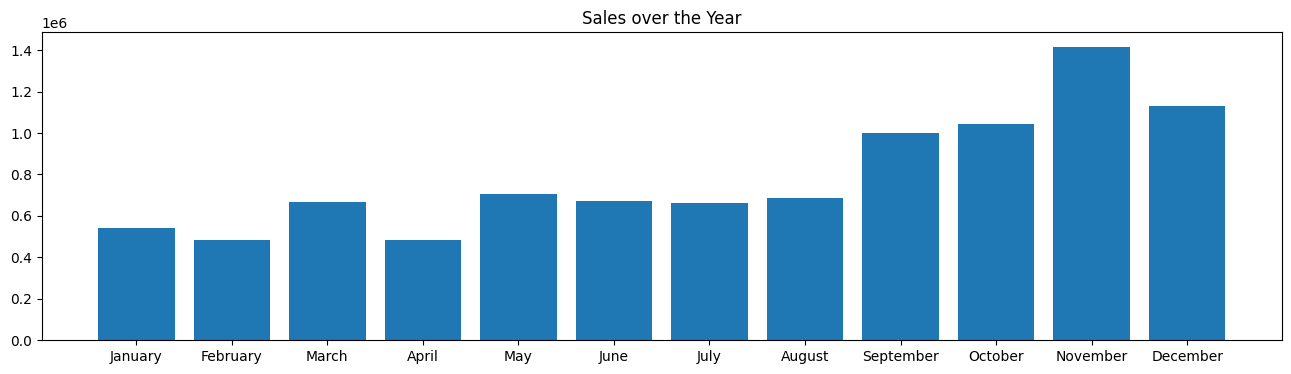

In [181]:
plt.figure(figsize=(16, 4))
plt.bar( column_sum[:-1].index, column_sum.values[:-1])
plt.title('Sales over the Year')
plt.show

  RESUME: Analysis by month showed that there is an increase in sales throughout the year and the maximum figure fall to November

In [ ]:
customer_monthly_binary = customer_monthly_sales.applymap(lambda x: 1 if x > 0 else 0)
customer_monthly_binary['Total'] = customer_monthly_binary.iloc[:, 1:].sum(axis=1)
customer_monthly_binary


Month,January,February,March,April,May,June,July,August,September,October,November,December,Total
CustomerID,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1,1,12
12346,0,0,0,0,0,0,0,0,0,0,0,0,0
12347,1,0,0,1,0,1,0,1,0,1,0,1,6
12348,1,0,0,1,0,0,0,0,1,0,0,1,4
12349,0,0,0,0,0,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,0,0,1,0,0,0,0,0,0,0,0,0,2
18281,0,0,0,0,0,1,0,0,0,0,0,0,2
18282,0,0,0,0,0,0,0,1,0,0,0,1,3


In [ ]:

# Segmentation by behavior

# [CustomerID] Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
#   123456       1   0   1   1   1   1   1   1   1   1   1   1   'active'
#   123457       0   0   0   0   0   1   1   1   1   1   1   1   'new active customer'
#   123458       1   0   1   0   1   0   1   0   1   0   1   1   'periodic buying'
#   123459       1   1   1   1   1   1   1   1   0   0   0   0   "stop buying'

# .5. Bonus Customer Churn Prediction:

We will define as “left” those customers who have not placed orders in the last 6 months

In [ ]:
left_customers = customer_monthly_binary[(customer_monthly_binary['December']+customer_monthly_binary['November']+customer_monthly_binary['October']+customer_monthly_binary['September']+customer_monthly_binary['August']+customer_monthly_binary['July'] == 0)]
left_customers

Month,January,February,March,April,May,June,July,August,September,October,November,December,Total
CustomerID,,,,,,,,,,,,,
12346,0,0,0,0,0,0,0,0,0,0,0,0,0
12350,0,1,0,0,0,0,0,0,0,0,0,0,2
12353,0,0,0,0,1,0,0,0,0,0,0,0,2
12354,0,0,0,1,0,0,0,0,0,0,0,0,2
12355,0,0,0,0,1,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18250,0,1,0,0,0,0,0,0,0,0,0,0,2
18256,0,0,0,0,0,0,0,0,0,0,0,0,0
18268,0,0,0,0,0,0,0,0,0,0,0,0,0


We received 600 “left” consumers. Now, based on data for the first 6 months of their activity (historical data), we can use machine learning to determine whether “active” buyers have similar patterns of behavior and predict potencial churn.

As a result, we can take active marketing actions towards these buyers